In [174]:
import pandas as pd

In [175]:
df = pd.read_csv("framingham.csv")

In [176]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [178]:
df.drop(["education"], axis=1, inplace=True)

In [179]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [180]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [181]:
df.dropna(axis=0, inplace=True)

In [182]:
isnull_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_num.append(x)

pd.DataFrame(isnull_num, index=df.columns, columns=["Total Missing Values"])

,Total Missing Values
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [183]:
# Examining unique values

unique_val = []
for i in df.columns:
    x = len(df[i].unique())
    unique_val.append(x)

tot_unique_val_df = pd.DataFrame(unique_val, index=df.columns, columns=["Total Unique Values"])
tot_unique_val_df

,Total Unique Values
male,2
age,39
currentSmoker,2
cigsPerDay,33
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
totChol,242
sysBP,231


In [184]:
numeric_var = tot_unique_val_df[tot_unique_val_df["Total Unique Values"]!=2].index.tolist()
numeric_var

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [185]:
categorical_var = tot_unique_val_df[tot_unique_val_df["Total Unique Values"]==2].index.tolist()
categorical_var

['male',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [186]:
df[numeric_var].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,49.578821,9.005335,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169
std,8.569322,11.922440,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039
min,32.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000
75%,56.000000,20.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


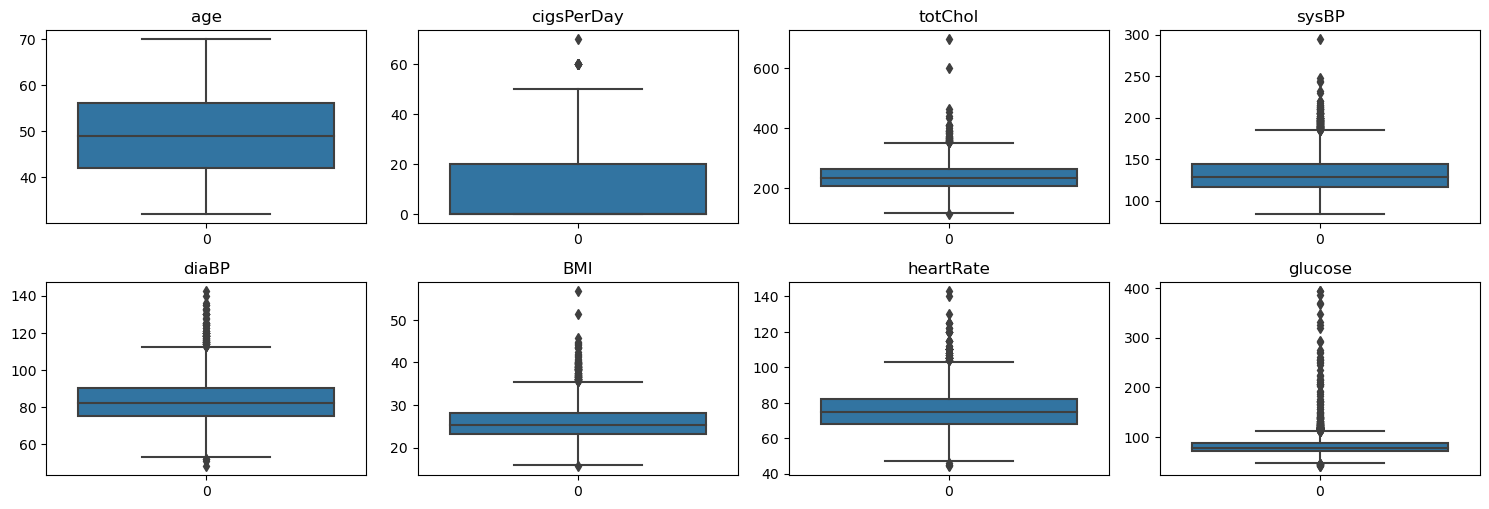

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, column in enumerate(df[numeric_var], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

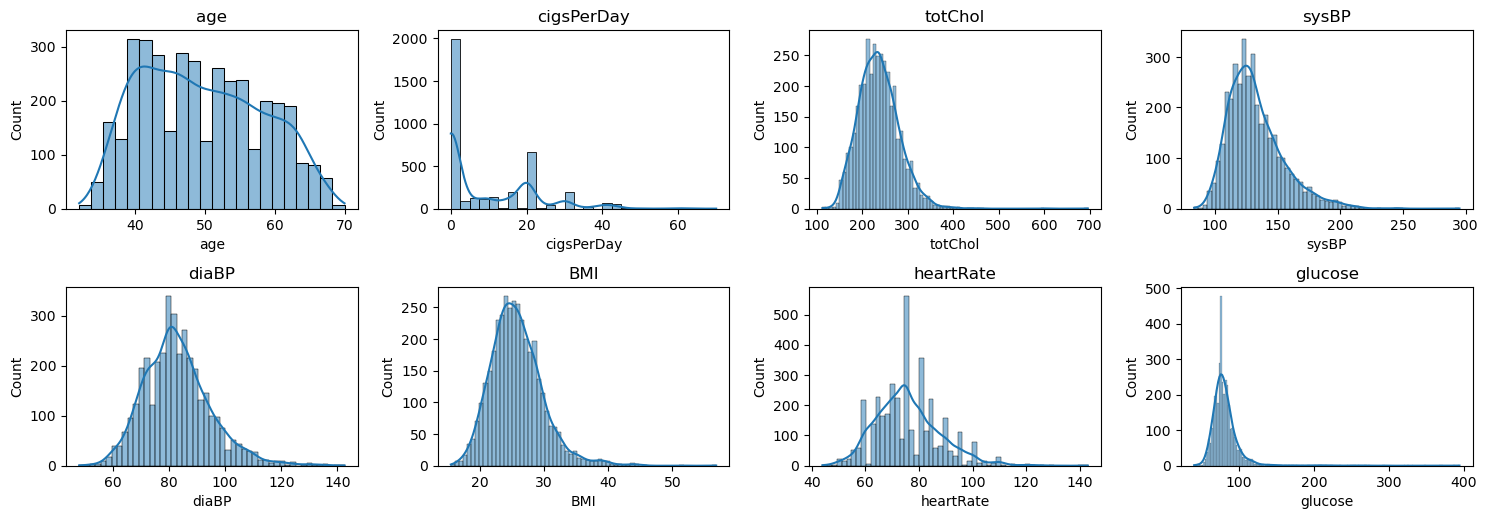

In [132]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df[numeric_var], 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [187]:
categorical_var 

['male',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [135]:
import math

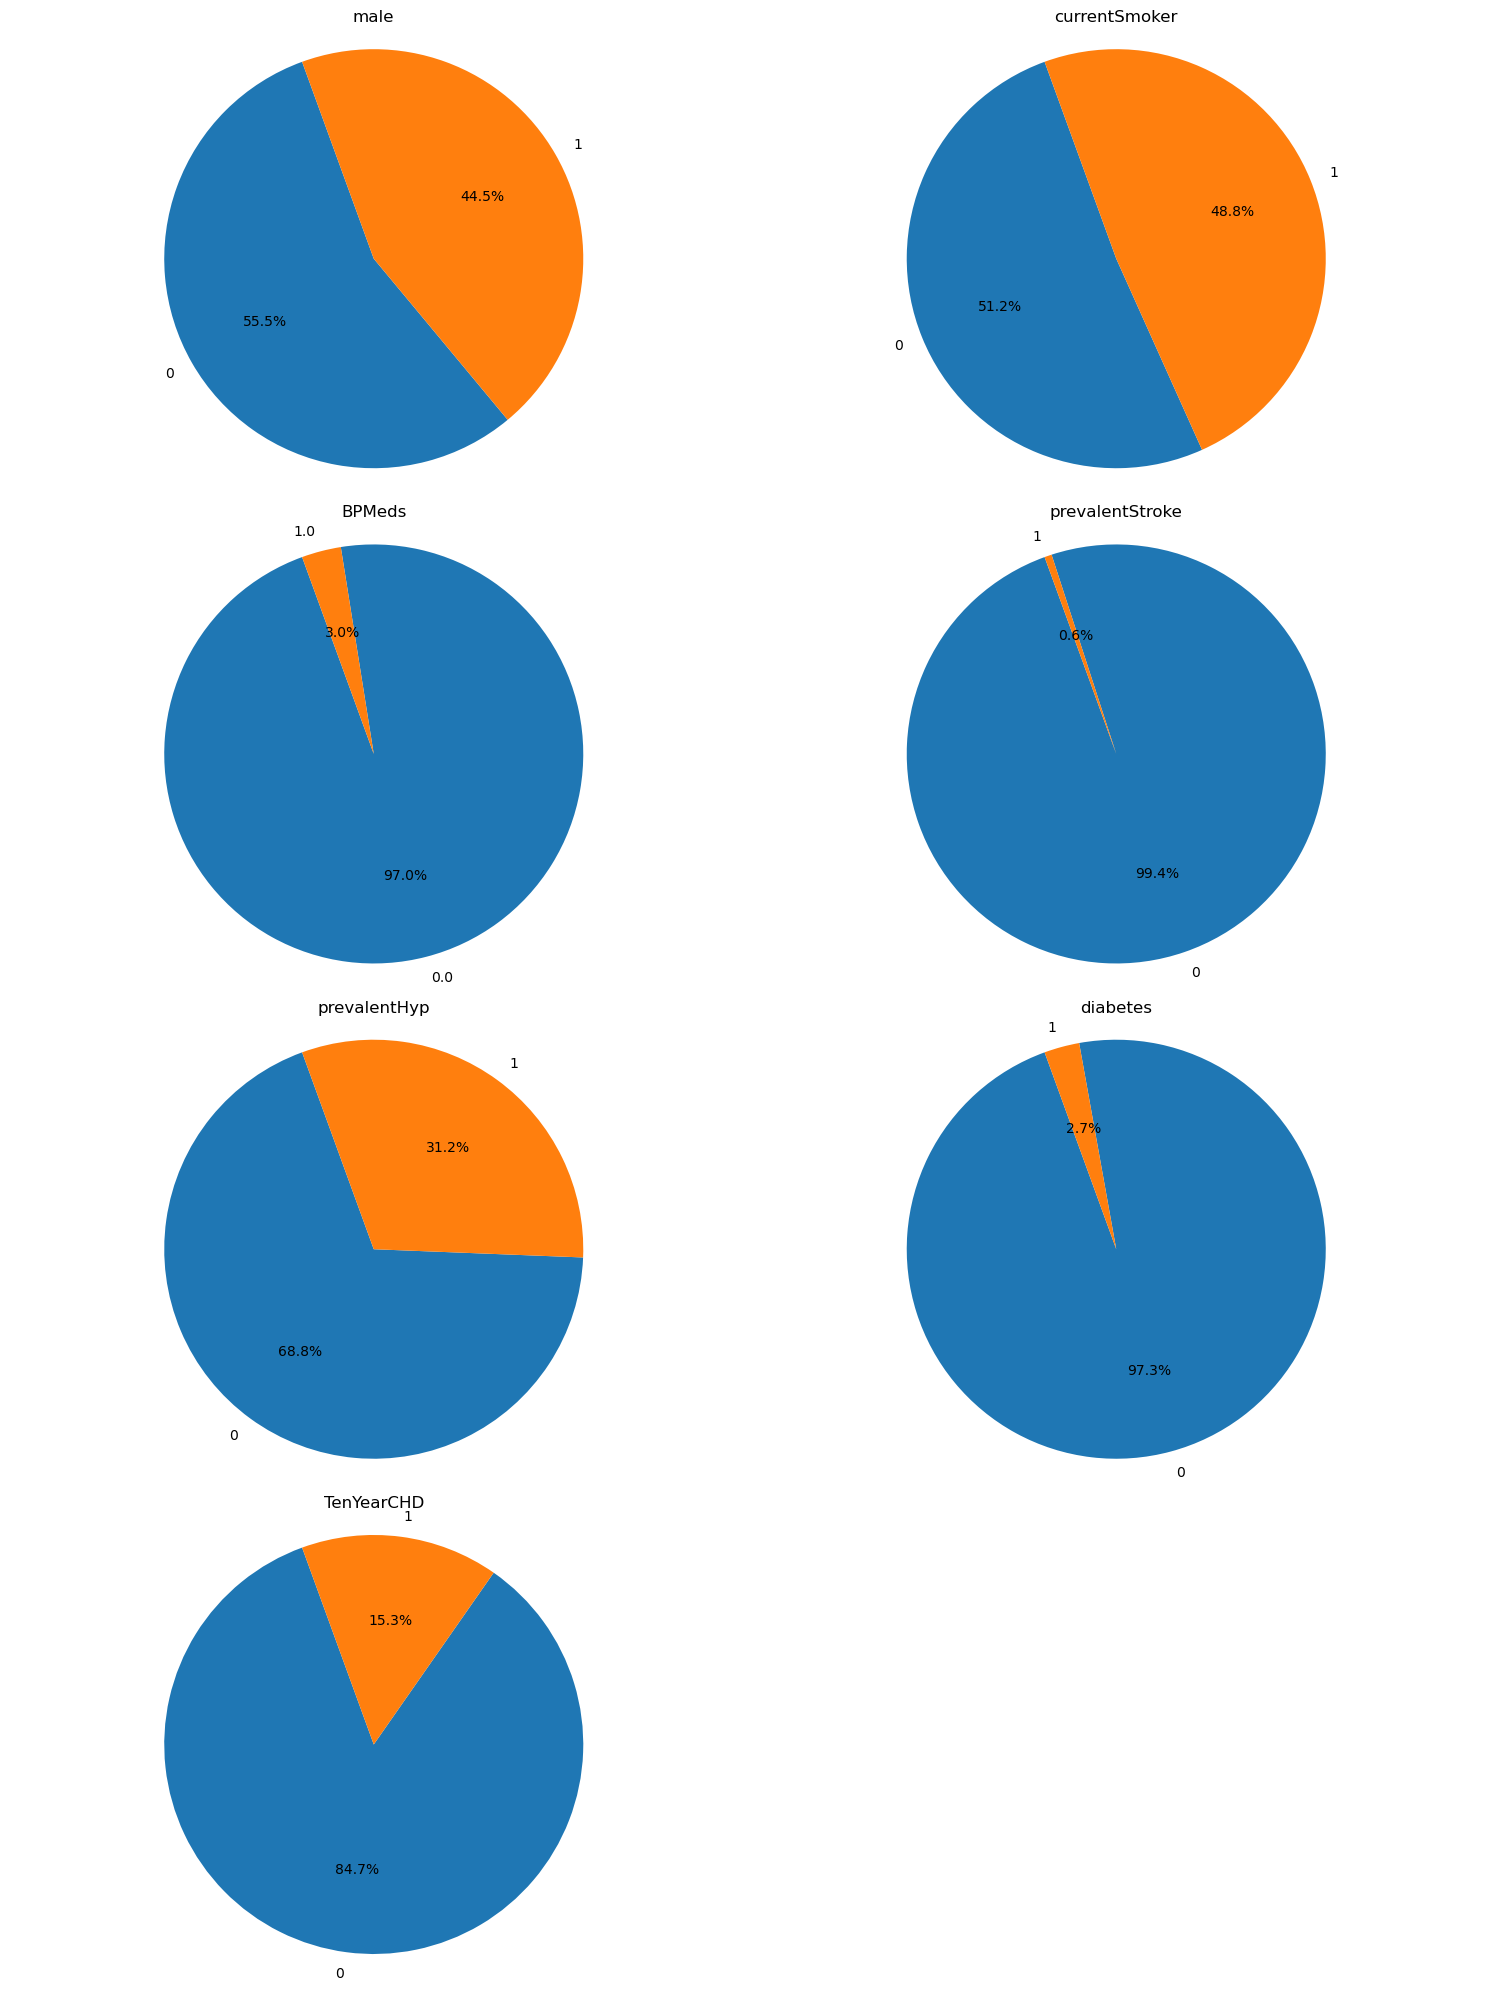

In [136]:

n_cols = 2
n_rows = math.ceil(len(categorical_var) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(categorical_var, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    observation_val = list(df[column].value_counts().index)
    total_observation_val = list(df[column].value_counts())

    ax.pie(total_observation_val, labels=observation_val, autopct="%1.1f%%", startangle=110)
    ax.set_title(column)
    ax.axis("equal")

plt.tight_layout()
plt.show()

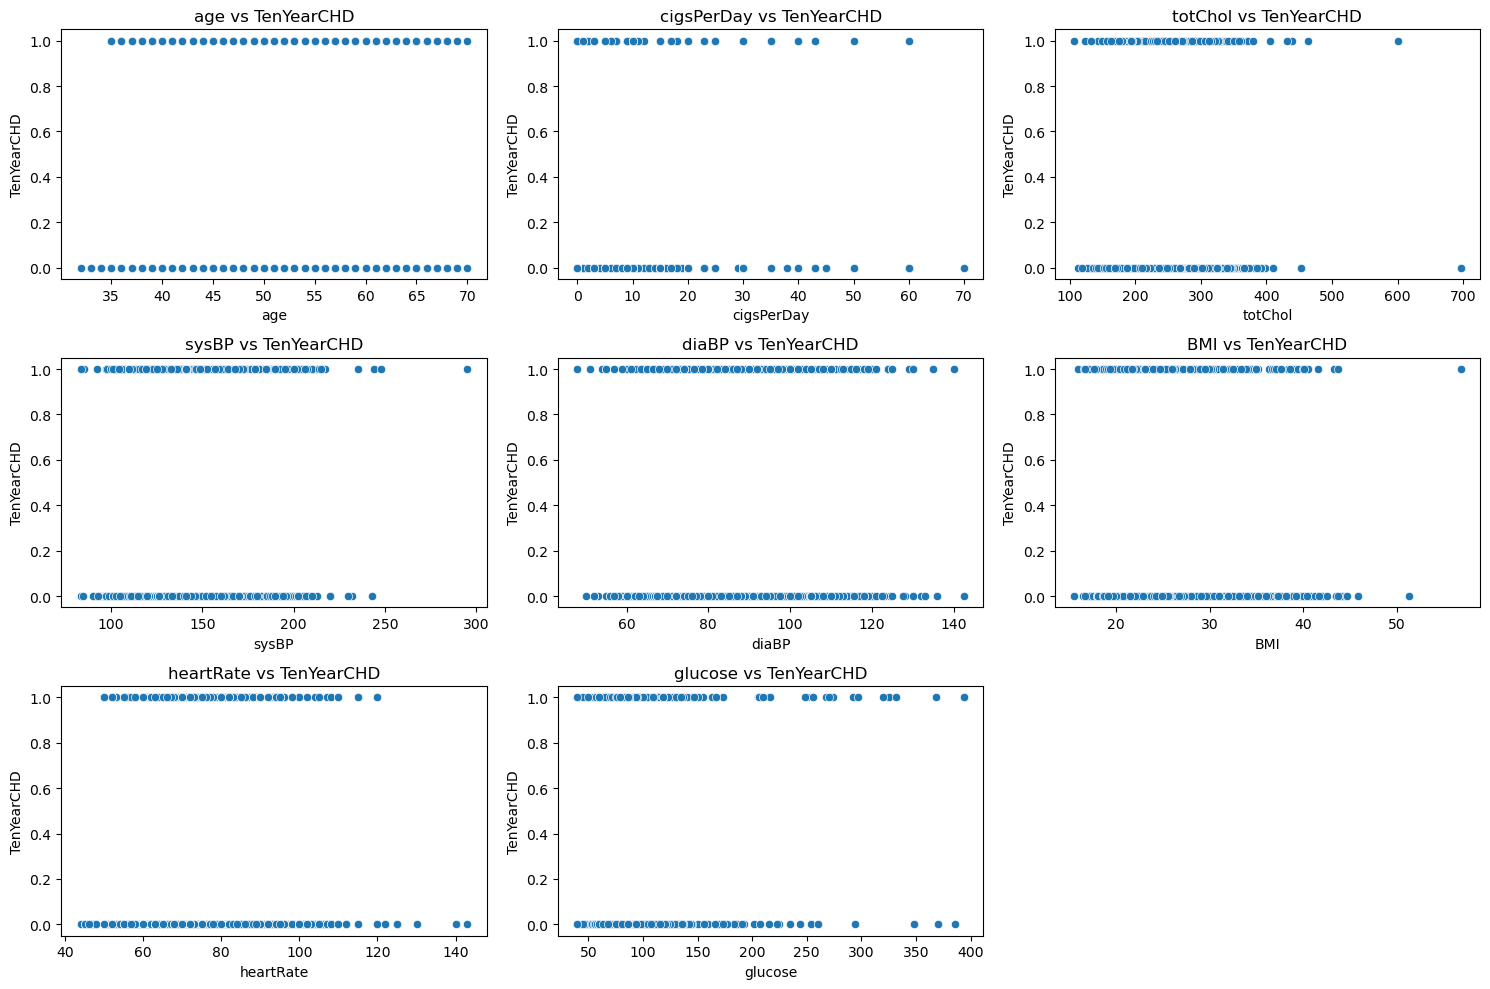

In [72]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_var, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[column], y=df["TenYearCHD"])
    plt.title(f'{column} vs {"TenYearCHD"}')

plt.tight_layout()
plt.show()

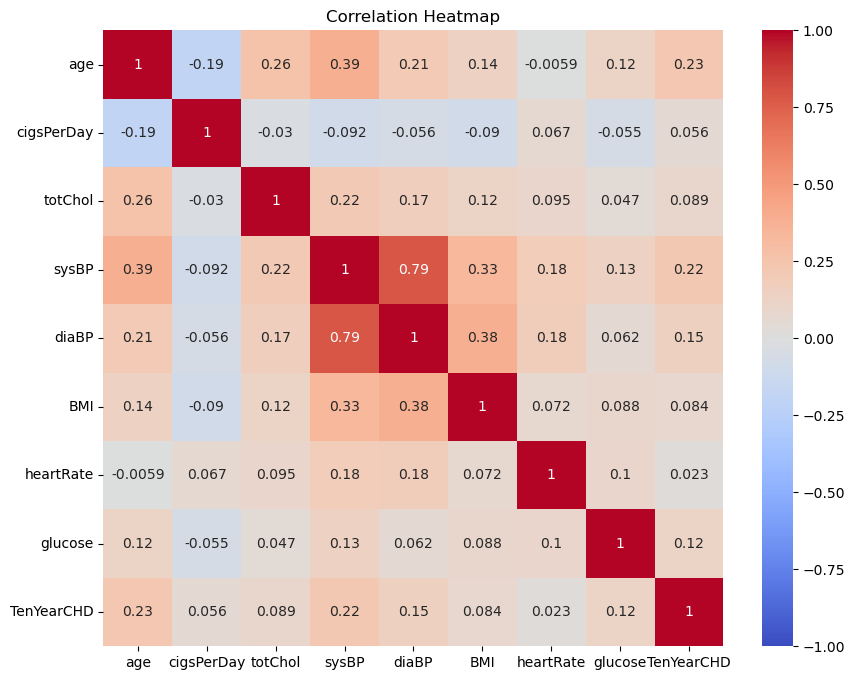

In [137]:
plt.figure(figsize=(10, 8))
corr = df[numeric_var + ["TenYearCHD"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

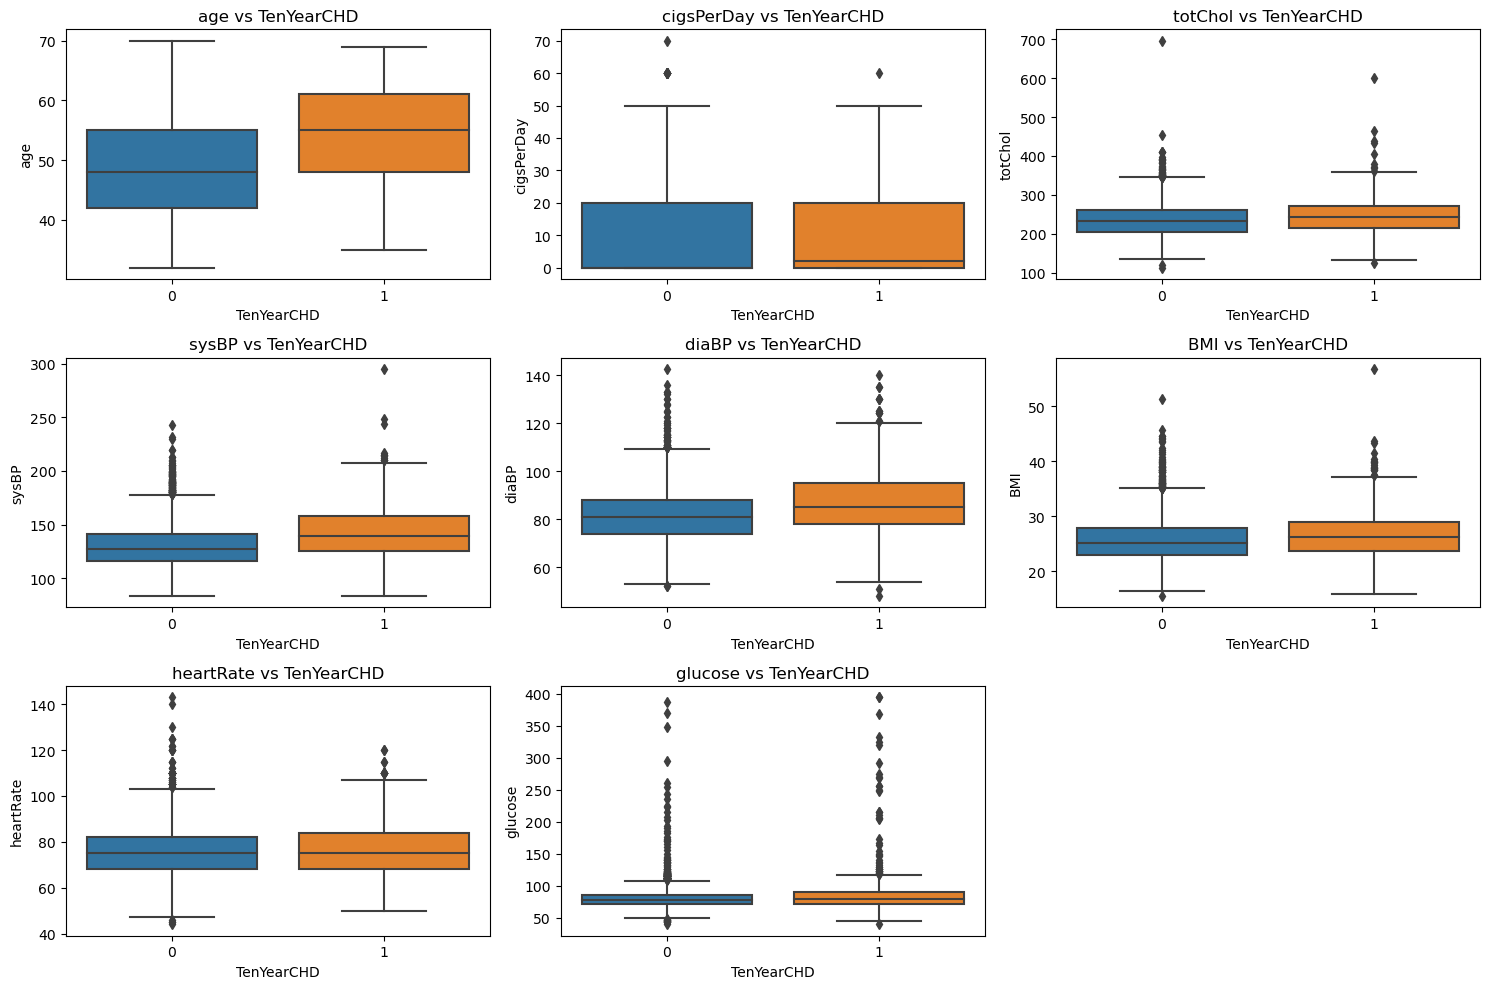

In [138]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_var, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df["TenYearCHD"], y=df[column])
    plt.title(f'{column} vs {"TenYearCHD"}')

plt.tight_layout()
plt.show()

In [188]:
# Dealing with outliers

from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import numpy as np

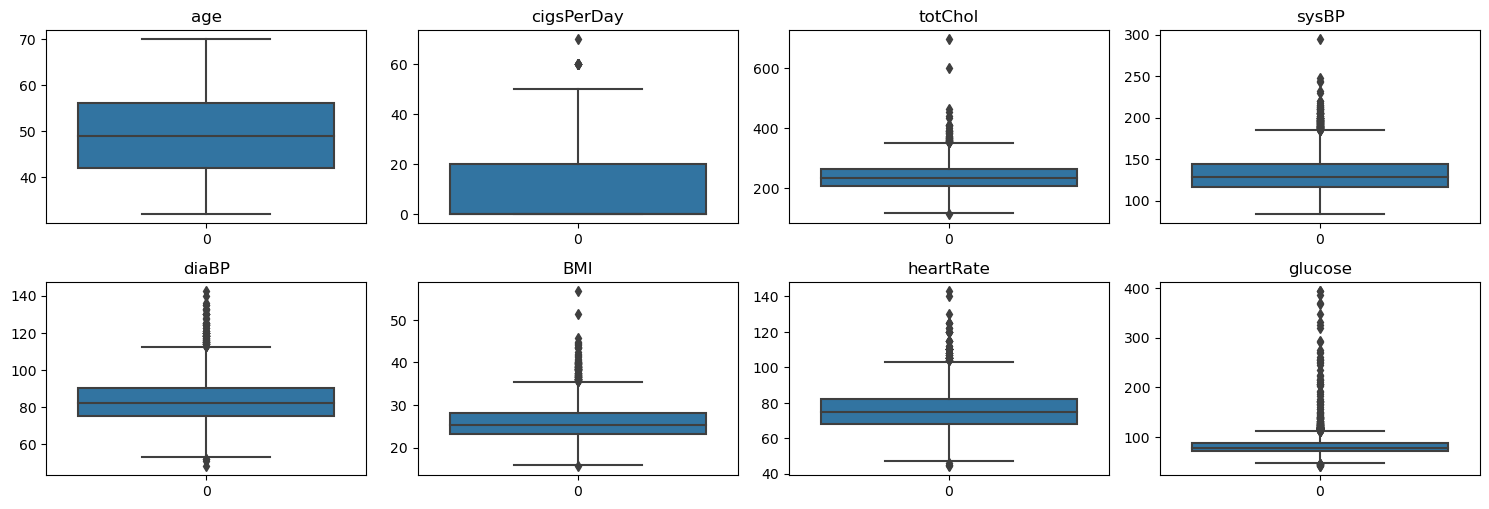

In [140]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df[numeric_var], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [189]:
z_score_cigs = zscore(df["age"])
for threshold in range(1, 3):
    outliers = np.where(np.abs(z_score_cigs) > threshold)[0]
    print("Threshold Value: {}".format(threshold))
    print("Number of outliers: {}".format(len(outliers)))
    print("----------------")

Threshold Value: 1
Number of outliers: 1525
----------------
Threshold Value: 2
Number of outliers: 64
----------------


In [190]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [191]:
numeric_var

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [192]:
df[numeric_var].agg(["skew"]).transpose()

,skew
age,0.229410
cigsPerDay,1.238241
totChol,0.912234
sysBP,1.153645
diaBP,0.704857
BMI,0.979141
heartRate,0.664850
glucose,6.240690


In [210]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [211]:
df_trans = df.copy()

def log_transform(column):
    # Add a small constant to avoid log(0) issues if necessary
    return np.log(column + 1)

vars_to_transform = ['cigsPerDay', 'totChol', 'sysBP', 'BMI', 'glucose']

for var in vars_to_transform:
    df_trans[var] = log_transform(df_trans[var])

# Check skewness again
skewness_transformed = df_trans[vars_to_transform].agg(["skew"]).transpose()
print(skewness_transformed)

                skew
cigsPerDay  0.315486
totChol     0.032198
sysBP       0.604921
BMI         0.325358
glucose     2.268676


In [212]:
df_trans.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.000000,0.0,0,0,0,5.278115,4.672829,70.0,3.331133,80.0,4.356709,0
1,0,46,0,0.000000,0.0,0,0,0,5.525453,4.804021,81.0,3.392157,95.0,4.343805,0
2,1,48,1,3.044522,0.0,0,0,0,5.505332,4.855929,80.0,3.271089,75.0,4.262680,0
3,0,61,1,3.433987,0.0,0,1,0,5.420535,5.017280,95.0,3.387098,65.0,4.644391,1
4,0,46,1,3.178054,0.0,0,0,0,5.655992,4.875197,84.0,3.182212,85.0,4.454347,0


In [213]:
# one hot encoding to categorical variables

categorical_var = ['male',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes']

In [214]:
df_trans = pd.get_dummies(df_trans, columns=categorical_var, drop_first=True)


In [215]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3749 non-null   int64  
 1   cigsPerDay         3749 non-null   float64
 2   totChol            3749 non-null   float64
 3   sysBP              3749 non-null   float64
 4   diaBP              3749 non-null   float64
 5   BMI                3749 non-null   float64
 6   heartRate          3749 non-null   float64
 7   glucose            3749 non-null   float64
 8   TenYearCHD         3749 non-null   int64  
 9   male_1             3749 non-null   bool   
 10  currentSmoker_1    3749 non-null   bool   
 11  BPMeds_1.0         3749 non-null   bool   
 12  prevalentStroke_1  3749 non-null   bool   
 13  prevalentHyp_1     3749 non-null   bool   
 14  diabetes_1         3749 non-null   bool   
dtypes: bool(6), float64(7), int64(2)
memory usage: 314.9 KB


In [216]:
for column in df_trans.columns:
    if df_trans[column].dtype == 'bool':
        df_trans[column] = df_trans[column].astype(int)

In [217]:
df_trans.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male_1,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,39,0.000000,5.278115,4.672829,70.0,3.331133,80.0,4.356709,0,1,0,0,0,0,0
1,46,0.000000,5.525453,4.804021,81.0,3.392157,95.0,4.343805,0,0,0,0,0,0,0
2,48,3.044522,5.505332,4.855929,80.0,3.271089,75.0,4.262680,0,1,1,0,0,0,0
3,61,3.433987,5.420535,5.017280,95.0,3.387098,65.0,4.644391,1,0,1,0,0,1,0
4,46,3.178054,5.655992,4.875197,84.0,3.182212,85.0,4.454347,0,0,1,0,0,0,0


In [218]:
# feature scaling numeric data

numeric_var

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [219]:
from sklearn.preprocessing import RobustScaler

robus_scaler = RobustScaler()

In [220]:
df_trans[numeric_var] = robus_scaler.fit_transform(df_trans[numeric_var])

In [221]:
df_trans.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male_1,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,-0.714286,0.000000,-0.734667,-0.907471,-0.800000,0.305971,0.357143,-0.063482,0,1,0,0,0,0,0
1,-0.214286,0.000000,0.266658,-0.270767,-0.066667,0.631319,1.428571,-0.127784,0,0,0,0,0,0,0
2,-0.071429,1.000000,0.185198,-0.018847,-0.133333,-0.014150,0.000000,-0.532056,0,1,1,0,0,0,0
3,0.857143,1.127923,-0.158092,0.764223,0.866667,0.604352,-0.714286,1.370121,1,0,1,0,0,1,0
4,-0.214286,1.043860,0.795132,0.074666,0.133333,-0.487993,0.714286,0.423078,0,0,1,0,0,0,0


In [222]:
from sklearn.model_selection import train_test_split

In [223]:
X = df_trans.drop(columns=['TenYearCHD'])
y = df_trans['TenYearCHD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [224]:
X_train.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_1,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
546,-0.428571,1.177038,-0.494097,-0.432556,-1.133333,-0.203696,-1.071429,1.224258,1,1,0,0,0,0
2464,-0.642857,1.000000,0.440300,-0.642685,-1.000000,-0.776619,0.000000,-1.207518,0,1,0,0,0,0
3739,1.142857,0.000000,-0.776189,0.859699,1.200000,1.187662,0.000000,1.558192,0,0,0,0,1,1
3175,0.071429,0.756304,0.362294,0.309691,-0.066667,-0.494634,0.000000,0.000000,0,1,0,0,0,0
285,0.357143,0.000000,0.577032,-1.284609,-1.200000,-0.732433,-0.571429,-0.192926,0,0,0,0,0,0


In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [231]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [232]:
y_pred = log_reg.predict(X_test)

In [234]:
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: {}".format(accuracy))

Test accuracy: 0.8426666666666667


In [238]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_test, y_test, cv =10)
print(scores.mean())

# Avg value means model is not over-fitting

0.8333333333333333
